## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('raw.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_prep_course,math_score,reading_score,writing_score
0,male,group D,high school,standard,completed,88,22,77
1,female,group E,some high school,standard,none,76,46,80
2,female,group C,some high school,free/reduced,none,38,100,1
3,male,group D,high school,free/reduced,none,11,98,41
4,male,group A,master's degree,free/reduced,completed,28,37,69


#### Preparing X and Y variables

In [4]:
X = df.drop(columns=['math_score'],axis=1)

In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_prep_course,reading_score,writing_score
0,male,group D,high school,standard,completed,22,77
1,female,group E,some high school,standard,none,46,80
2,female,group C,some high school,free/reduced,none,100,1
3,male,group D,high school,free/reduced,none,98,41
4,male,group A,master's degree,free/reduced,completed,37,69


In [6]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_prep_course'].unique())

Categories in 'gender' variable:      ['male' 'female']
Categories in 'race_ethnicity' variable:   ['group D' 'group E' 'group C' 'group A' 'group B']
Categories in'parental level of education' variable: ['high school' 'some high school' "master's degree" "bachelor's degree"
 "associate's degree" 'some college']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['completed' 'none']


In [7]:
y = df['math_score']

In [8]:
y

0       88
1       76
2       38
3       11
4       28
        ..
997     70
998     22
999     64
1000    64
1001    64
Name: math_score, Length: 1002, dtype: int64

In [9]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [10]:
X = preprocessor.fit_transform(X)

In [11]:
X.shape

(1002, 19)

In [60]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((801, 19), (201, 19))

In [61]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [64]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 29.0565
- Mean Absolute Error: 25.1947
- R2 Score: 0.0054
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 29.6570
- Mean Absolute Error: 25.6840
- R2 Score: -0.0015


Lasso
Model performance for Training set
- Root Mean Squared Error: 29.1347
- Mean Absolute Error: 25.2546
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 29.6642
- Mean Absolute Error: 25.7645
- R2 Score: -0.0019


Ridge
Model performance for Training set
- Root Mean Squared Error: 29.0565
- Mean Absolute Error: 25.1948
- R2 Score: 0.0054
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 29.6561
- Mean Absolute Error: 25.6839
- R2 Score: -0.0014


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 26.4815
- Mean Absolute Error: 22.3556
- R2 Score: 0.1738
------

In [65]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
8,AdaBoost Regressor,0.002044
2,Ridge,-0.001399
0,Linear Regression,-0.001458
1,Lasso,-0.001946
5,Random Forest Regressor,-0.112372
7,CatBoosting Regressor,-0.184375
3,K-Neighbors Regressor,-0.213240
6,XGBRegressor,-0.358098
4,Decision Tree,-0.900726


## Linear Regression

In [66]:
ada_model = AdaBoostRegressor()
ada_model = ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is -0.21


## Plot y_pred and y_test

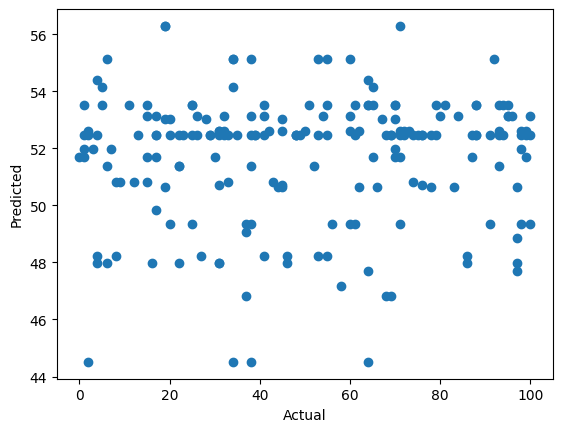

In [67]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

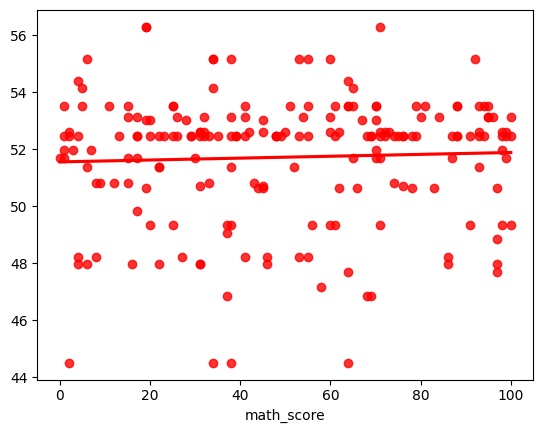

In [68]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [69]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,49.358844,41.641156
739,26,52.463014,-26.463014
823,41,53.528864,-12.528864
662,34,55.150224,-21.150224
411,15,53.528864,-38.528864
...,...,...,...
332,60,49.358844,10.641156
208,1,51.699248,-50.699248
615,25,49.358844,-24.358844
78,41,52.463014,-11.463014
